<center><h1>Python for Data Analysis and Scientific Computing</h1></center>
<center><h2>Final Project</h2></center>
<center> By Sebastien Mascha and Thomas Le Couédic </center>
<center><i> s.mascha@berkeley.edu | tlc10@berkeley.edy </i></center>

# Project Objective and data
The problem of authentication of published information and who can see and share it and the risk of the unwanted malicious users represent a real privacy problem for the user, (OSN)s try to manage users’ privacy by using “privacy settings” for the services in many cases , but in fact a new violations ranging from identity theft up to personal information exposure are disclosed daily with the ease of re-uploading and re-publishing a user’s images, without informing the real owner, this will harm the owner both social and economically.

Generally, steganography is used to embed data into multimedia (images, audio or video)

The implemented technique includes two stages, hashing and embedding ; in hashing the (SHA) algorithm will encrypt signature of the user to obtain hash value, while embedding will embed the hash value into the image ,that’s how the technique will guarantee that no signed images could be re-upload by other users.

## Table of Contents
1. Pre-processing (image info, formatting, check for existing metadata)
1. Image transformation (filters, interpolation, data augmentation, crop)
1. Steganography (encode metadata in the image, Compare original and encoded images)

# Implementation
**Importations**

In [1]:
__version__ = "1.0"
__author__ = "Sebastien Mascha, Thomas Le Couedic"
__email__ = "s.mascha@berkeley.edu, tlc10@berkeley.edu"

In [2]:
import statistics
import sys
print("Python and compiler version:")
print(sys.version)

# Provides n-dimensional array object
import numpy as np
# Data analysis and manipulation tool
import pandas as pd
# Fundamental package for scientific computing
import scipy
from scipy import misc, ndimage

# Plotting library
%matplotlib inline
import matplotlib as mpl
# State-based interface to matplotlib
import matplotlib.pyplot as plt

# Data Mining and Machine Learning
#from sklearn import datasets
import cv2
print("\nOpenCV version: " + cv2.__version__)
# The Python Imaging Library (PIL) adds image processing capabilities to your Python interpreter.
import PIL
print("\nPIL version: " + PIL.__version__)
from PIL import Image, ExifTags
#import tensorflow as tf
#print("TensorFlow version: " + tf.__version__)

Python and compiler version:
3.8.1 (default, Feb  2 2020, 08:49:34) 
[GCC 8.3.0]

OpenCV version: 4.5.1

PIL version: 8.2.0


# Pre-processing

Filename :  photo.png
Format :  PNG
Mode :  RGBA
Size :  (3584, 2240)
Width :  3584
Height :  2240
Image Palette :  None




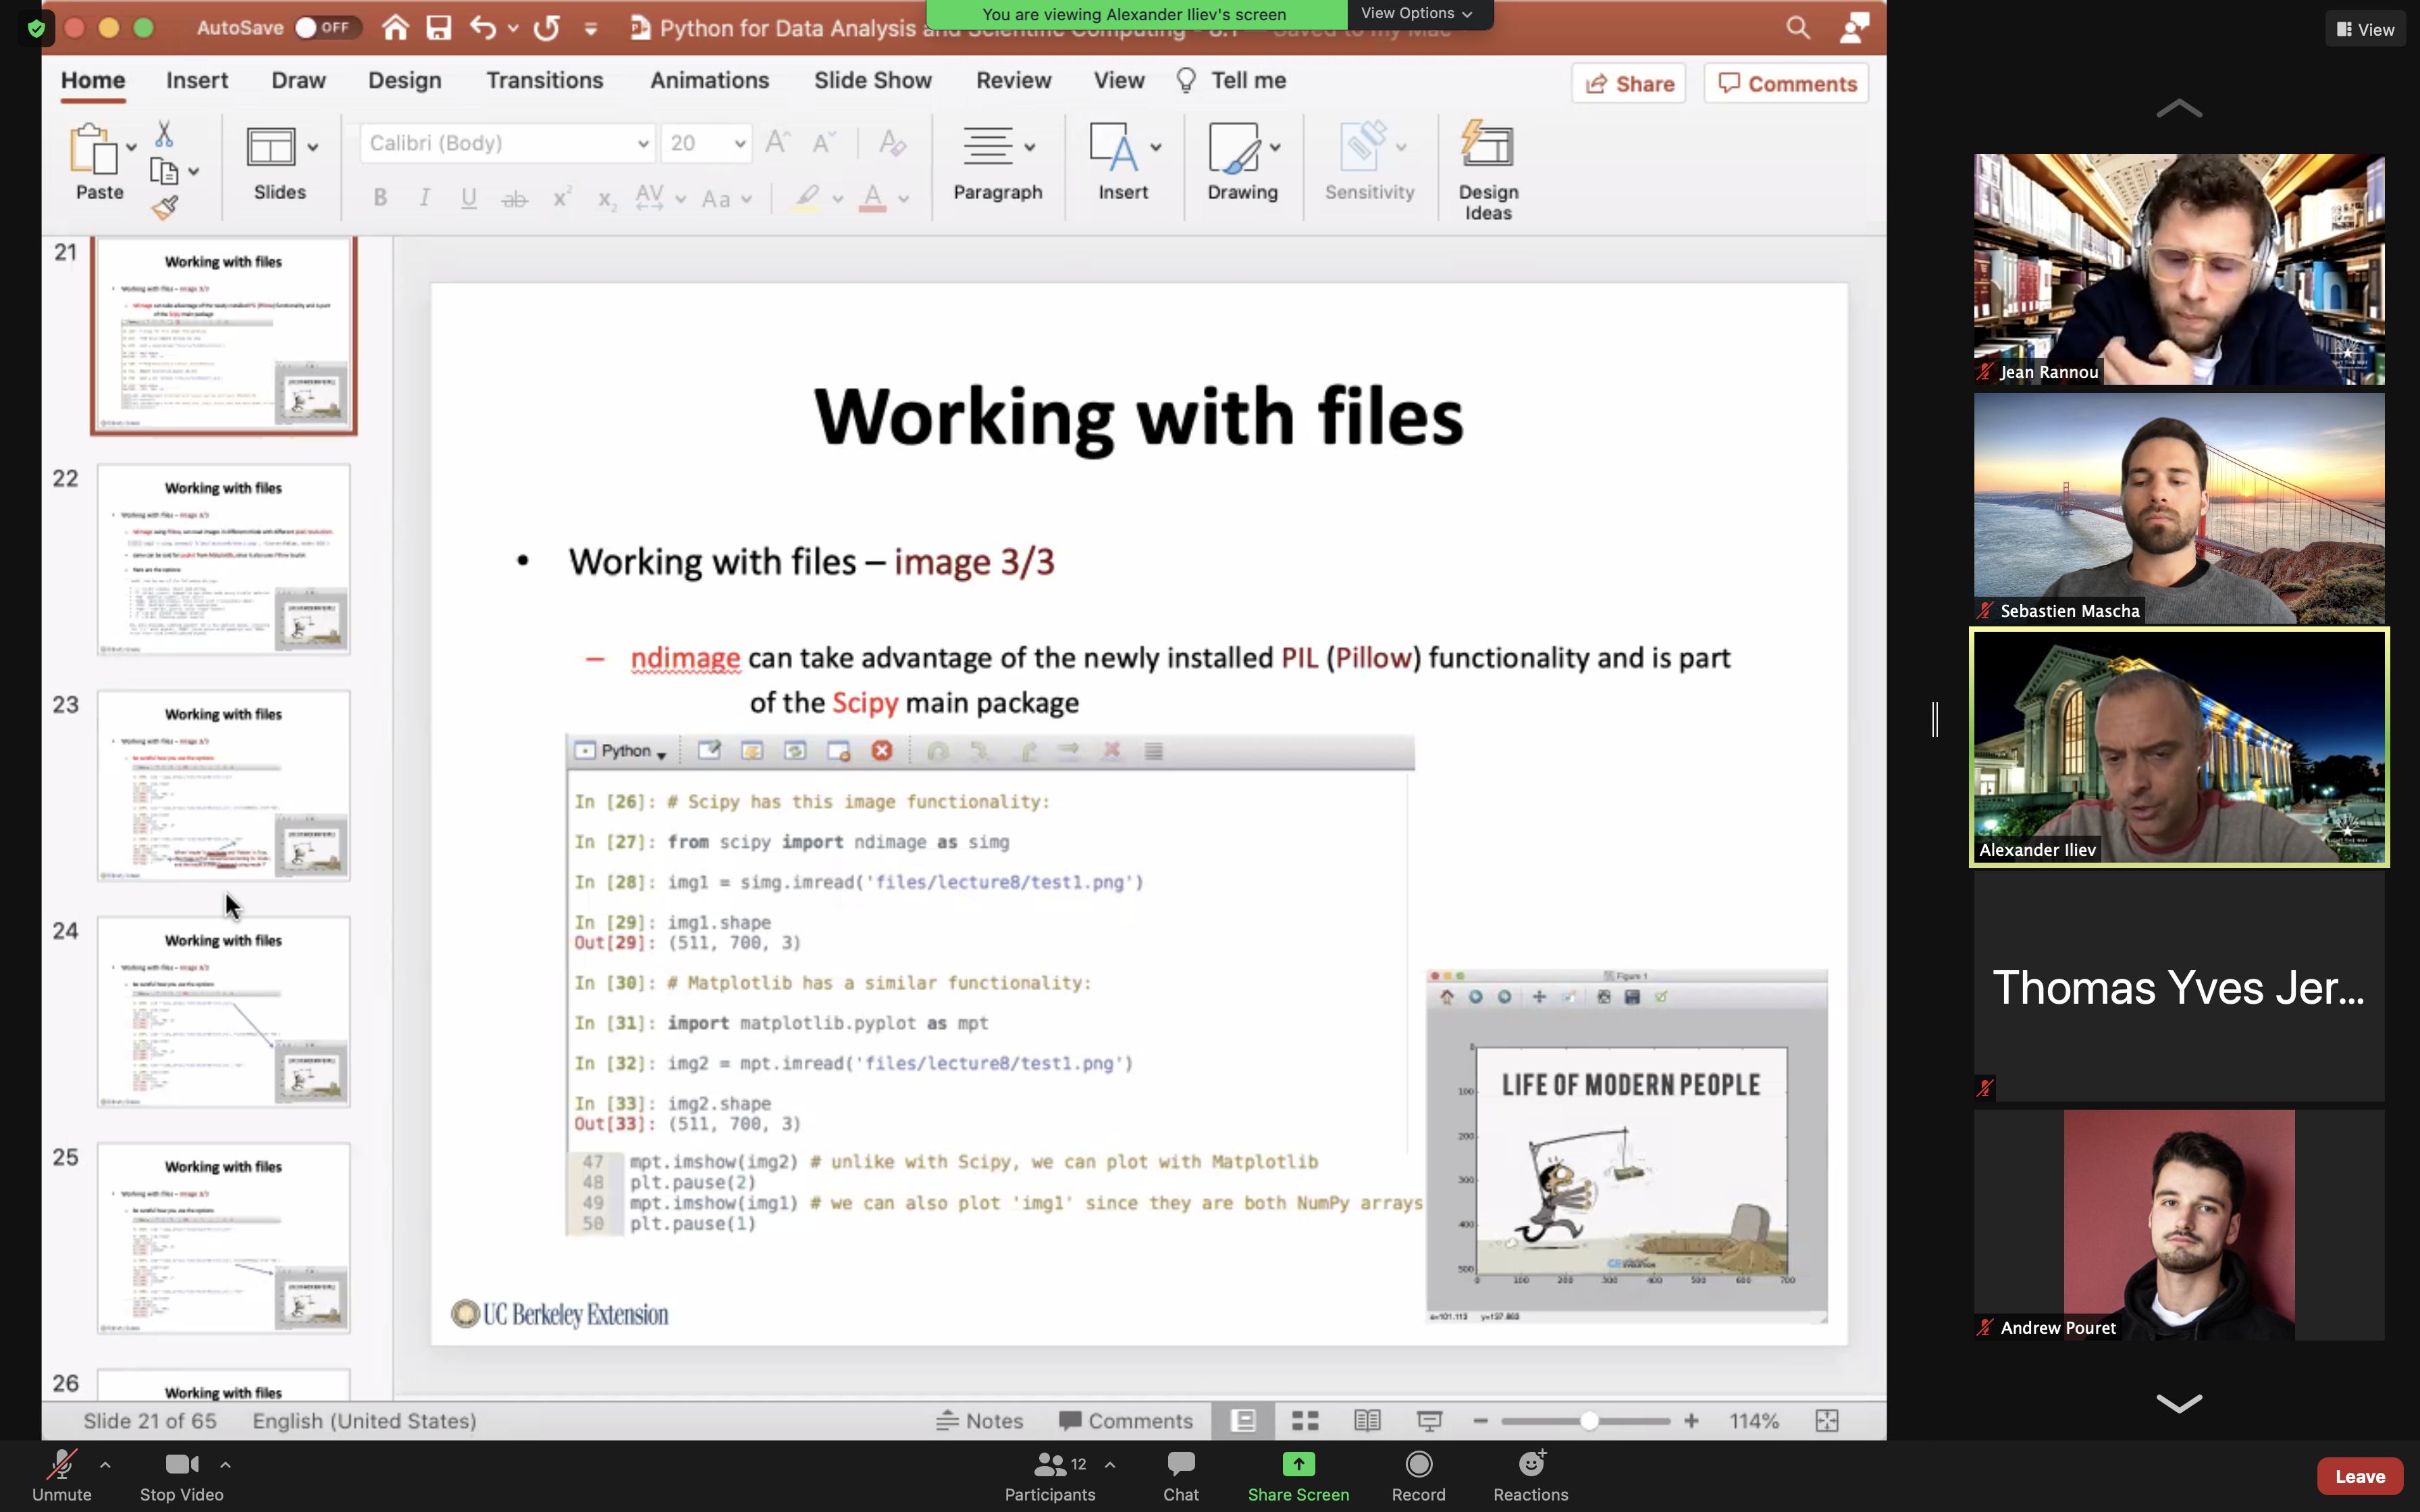

In [3]:
#This function allows us to get the basic information of an image
def img_information(img):
    # Opening Image as an object
    image = Image.open(img)
    # Getting the filename of image
    print("Filename : ",image.filename)
    # Getting the format of image
    print("Format : ",image.format)
    # Getting the mode of image
    print("Mode : ",image.mode)
    # Getting the size of image
    print("Size : ",image.size)
    # Getting only the width of image
    print("Width : ",image.width)
    # Getting only the height of image
    print("Height : ",image.height)
    # Getting the color palette of image
    print("Image Palette : ",image.palette)
    print("\n")
    # Showing image
    image.show()
    # Closing Image object
    image.close()

img_information("photo.png")

In [4]:
#Check for potential metadata
def get_metadata(img):
    image = Image.open(img)
    exif = { ExifTags.TAGS[k]: v for k, v in image._getexif().items() if k in ExifTags.TAGS }
    return exif

get_metadata("photo.png")

{'ResolutionUnit': 2,
 'ExifOffset': 78,
 'XResolution': 144.0,
 'YResolution': 144.0,
 'ExifImageWidth': 3584,
 'ExifImageHeight': 2240,
 'UserComment': b'ASCII\x00\x00\x00Screenshot'}

# Image Transformation

In [16]:
#Open the image and convert it to grayscale using PIL and save it in the main folder
img = Image.open('photo.png').convert('LA')
img.save('photo_gray.png')

Type of image_gray after using cv2.imread:  <class 'numpy.ndarray'>
Grayscale image : 



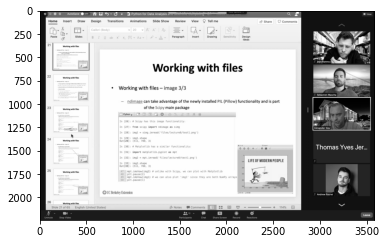

In [17]:
#Use matplotlib and imshow to display an image inside a matplotlib figure
image_gray = cv2.imread("photo_gray.png") 
print("Type of image_gray after using cv2.imread: ",type(image_gray))
print("Grayscale image : \n")
plt.imshow(image_gray)

In [18]:
#convert 3D image to 2D image in order to use different methods
image_gray = image_gray[:,:,0]

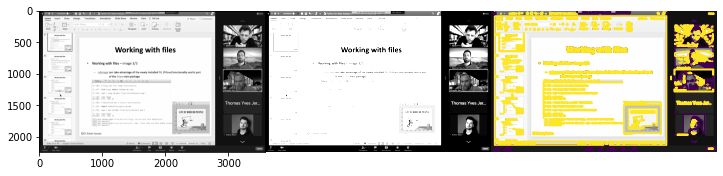

In [19]:
#Left to right : grayscale image | contrast increased | countour lines drawn
def display_images(img):
    plt.figure(figsize=(10, 3.6))

    plt.subplot(131)
    plt.imshow(img, cmap=plt.cm.gray)

    plt.subplot(132)
    plt.imshow(img, cmap=plt.cm.gray, vmin=30, vmax=200)
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.contour(img, [50, 200])
    plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
    plt.show()

display_images(img)

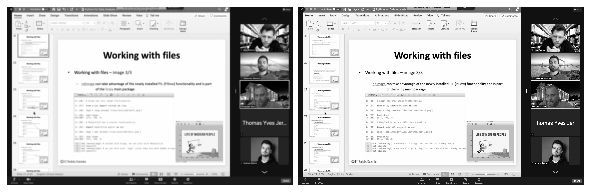

In [20]:
#image interpolation
def interpolation(img,interpolation_type):
    #interpolation_type
    #For smooth intensity variations, use interpolation='bilinear'. 
    #For fine inspection of intensity variations, use interpolation='nearest'
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap=plt.cm.gray, interpolation=interpolation_type)
    plt.axis('off')

    plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)
    plt.show()
    
interpolation(image_gray,nearest)

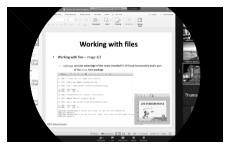

In [21]:
#Image manipulation and numpy arrays
def image_manipulation(img):
    img[10:13, 20:23]
    img[100:120] = 255

    lx, ly = img.shape
    X, Y = np.ogrid[0:lx, 0:ly]
    mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4
    img[mask] = 0
    img[range(400), range(400)] = 255

    plt.figure(figsize=(3, 3))
    plt.axes([0, 0, 1, 1])
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')

    plt.show()
    
    #original image_gray
    img = cv2.imread("photo_gray.png") 
    img = image_gray[:,:,0]

image_manipulation(image_gray)

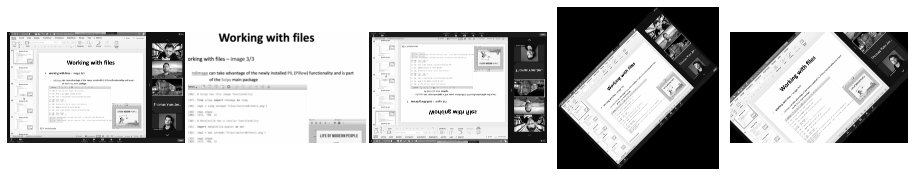

In [22]:
#Geometrical transformations
def geo_transfomation(img):
    lx, ly = img.shape
    # Cropping
    crop_img = img[lx//4:-lx//4, ly//4:-ly//4]
    # up <-> down flip
    flip_ud_img = np.flipud(img)
    # rotation
    rotate_img = ndimage.rotate(img, 45)
    rotate_img_noreshape = ndimage.rotate(img, 45, reshape=False)

    plt.figure(figsize=(12.5, 2.5))

    plt.subplot(151)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(152)
    plt.imshow(crop_img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(153)
    plt.imshow(flip_ud_img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(154)
    plt.imshow(rotate_img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(155)
    plt.imshow(rotate_img_noreshape, cmap=plt.cm.gray)
    plt.axis('off')

    plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

    plt.show()

geo_transfomation(image_gray)

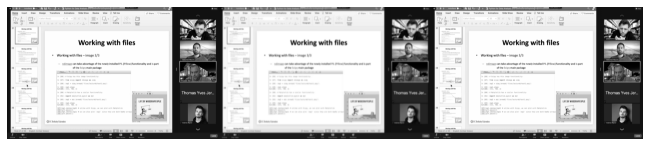

In [23]:
#blurring
def blurring(img):
    
    blurred_img = ndimage.gaussian_filter(img, sigma=3)
    very_blurred = ndimage.gaussian_filter(img, sigma=7)
    local_mean = ndimage.uniform_filter(img, size=11)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.imshow(blurred_img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(very_blurred, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(local_mean, cmap=plt.cm.gray)
    plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

    plt.show()
    
blurring(image_gray)

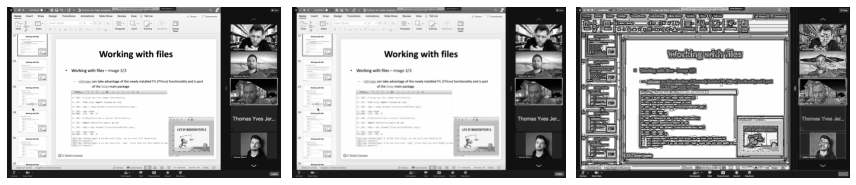

In [24]:
#sharpenning
def sharpenning(img,alpha=30):
    
    blurred_img = ndimage.gaussian_filter(img, 3)

    filter_blurred_img = ndimage.gaussian_filter(blurred_img, 1)

    sharpened = blurred_img + alpha * (blurred_img - filter_blurred_img)

    plt.figure(figsize=(12, 4))
 
    plt.subplot(131)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(blurred_img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(sharpened, cmap=plt.cm.gray)
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
sharpenning(image_gray)

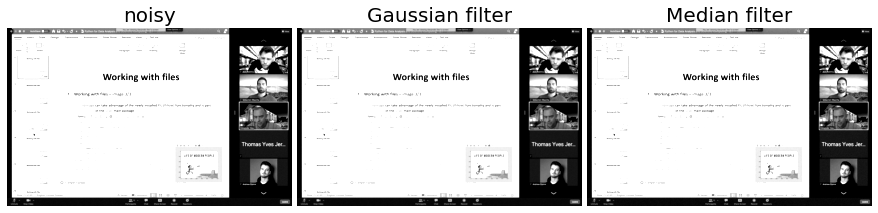

In [25]:
#denoising
def denoising(img):
    noisy = img + 0.4*img.std()*np.random.random(img.shape)

    gauss_denoised = ndimage.gaussian_filter(noisy, 2)
    med_denoised = ndimage.median_filter(noisy, 3)

    plt.figure(figsize=(12,2.8))

    plt.subplot(131)
    plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
    plt.axis('off')
    plt.title('noisy', fontsize=20)
    plt.subplot(132)
    plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
    plt.axis('off')
    plt.title('Gaussian filter', fontsize=20)
    plt.subplot(133)
    plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
    plt.axis('off')
    plt.title('Median filter', fontsize=20)

    plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                        right=1)
    plt.show()

denoising(image_gray)

# Steganography
**Available formats**
- PNG
- JPEG

In [27]:
# Install local packages
! pip uninstall -y /app/packages/steganography_tools/dist/steganography_tools-0.1.0-py3-none-any.whl
! pip install /app/packages/steganography_tools/dist/steganography_tools-0.1.0-py3-none-any.whl

Found existing installation: steganography-tools 0.1.0
Uninstalling steganography-tools-0.1.0:
  Successfully uninstalled steganography-tools-0.1.0
Processing /app/packages/steganography_tools/dist/steganography_tools-0.1.0-py3-none-any.whl


In [28]:
from steganography_tools import st

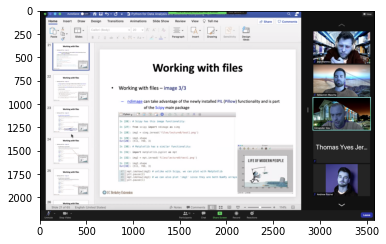

In [29]:
# Encoding
steg = st.LSBSteganography(cv2.imread("photo.png"))
img_encoded = steg.encode_text("my message")
cv2.imwrite("my_new_image.png", img_encoded)
plt.imshow(img_encoded)

In [30]:
# Decoding
im = cv2.imread("my_new_image.png")
steg = st.LSBSteganography(im)
print("Text value:",steg.decode_text())

Text value: my message


## Compare original and encoded images

In [31]:
original = cv2.imread("photo.png")
lsbEncoded = cv2.imread("my_new_image.png")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
lsb_encoded_img = cv2.cvtColor(lsbEncoded, cv2.COLOR_BGR2RGB)

compare_images = st.Compare(original, lsb_encoded_img)
compare_images.get_results()

meanSquareError: 6.4772002551020406e-06
psnr: 100.01693036557361
